### Data Analysis of Coronavirus Cases
+ Coronavirus
+ Covid19
#### Brief Info
+ Caused by the SARS-CoV-2 virus.
+ It was first identified in December 2019 in Wuhan, the capital of the Hubei province, China

#### Data Sources & Credit
+ https://github.com/CSSEGISandData/COVID-19
+ https://github.com/RamiKrispin/coronavirus
+ https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv


#### Questions
+ Number of Cases
+ Which country has the highest cases
+ Top countries affected
+ Distribution Per Continent
+ Cases Per Day
+ Cases Per Country(Affected Country)

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np 

In [2]:
# Load Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
### Load Geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

In [4]:
# Load Dataset
df = pd.read_csv("data/coronavirus_data.csv")

In [5]:
df.head()

,Index,Province/State\n,Country/Region\n,Lat\n,Long\n\n\n\n\n,Date\n\n\n\n\n,Confirmed\n,Deaths\n\n,Recovered\n\n\n\n\n
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [6]:
df.columns

Index(['Index', 'Province/State\n', 'Country/Region\n', 'Lat\n',
       'Long\n\n\n\n\n', 'Date\n\n\n\n\n', 'Confirmed\n', 'Deaths\n\n',
       'Recovered\n\n\n\n\n'],
      dtype='object')

In [8]:
df.columns.str.replace(r'\n','', regex=True)

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(r'\n','', regex=True)

In [10]:
df.columns

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [11]:
df.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)

In [12]:
df.columns

Index(['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [13]:
# Shape of Dataset
df.shape

(3885, 9)

In [14]:
# Datatypes
df.dtypes

Index               int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [15]:
# First 10
df.head(10)

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
5,6,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0
6,7,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0
7,8,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0
8,9,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0
9,10,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0


In [17]:
df = df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered']]

In [18]:
df.isna().sum()

Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [19]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,32.252000,45.775760,396.487773,10.804118,78.544402
std,18.256877,84.338854,4017.397180,137.191519,846.918788
min,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,27.610400,8.227500,0.000000,0.000000,0.000000
50%,35.191700,78.000000,2.000000,0.000000,0.000000
75%,42.315400,113.614000,40.000000,0.000000,4.000000
max,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [20]:
# Number of Case Per Date/Day
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [21]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [22]:
df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17,28
1/23/20,653,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
1/27/20,2927,82,61
1/28/20,5578,131,107
1/29/20,6166,133,126
1/30/20,8234,171,143


In [23]:
df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [24]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()

In [25]:
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [26]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [29]:
# Max No of Cases
df_per_day['Confirmed'].max()

65596

In [30]:
# Min No Of Cases
df_per_day['Confirmed'].min()

444

In [31]:
# Date for Maximum Number Cases
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [32]:
# Date for Min Number Cases
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [33]:
# Number of Case Per Country/Province
df.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,7,0,3


In [34]:
# Number of Case Per Country/Province
df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Anhui,Mainland China,989,6,792
Beijing,Mainland China,410,5,248
"Boston, MA",US,1,0,0
British Columbia,Canada,7,0,3
"Chicago, IL",US,2,0,2
Chongqing,Mainland China,576,6,401
Diamond Princess cruise ship,Others,705,4,10
From Diamond Princess,Australia,8,0,0
Fujian,Mainland China,296,1,228


In [35]:
df['Country_Region'].value_counts()

Mainland China          1147
US                       629
Australia                185
Canada                   111
Philippines               37
UK                        37
Egypt                     37
India                     37
Sri Lanka                 37
Cambodia                  37
Spain                     37
Georgia                   37
Hong Kong                 37
South Korea               37
Oman                      37
Estonia                   37
Afghanistan               37
Algeria                   37
Vietnam                   37
Pakistan                  37
San Marino                37
Sweden                    37
Greece                    37
Taiwan                    37
Croatia                   37
Bahrain                   37
Iran                      37
Romania                   37
Netherlands               37
Brazil                    37
Lebanon                   37
Russia                    37
Switzerland               37
Austria                   37
France        

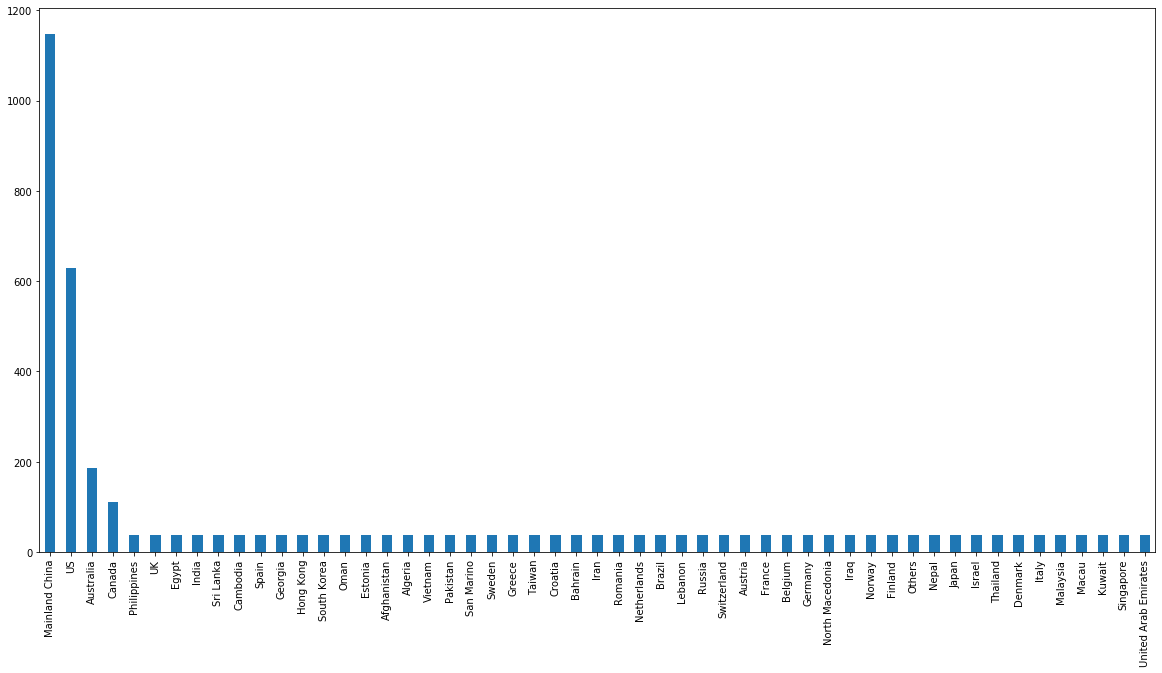

In [36]:
df['Country_Region'].value_counts().plot(kind='bar',figsize=(20,10))

In [37]:
# How Many Country Affect
df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [38]:
# How Many Country Affect
len(df['Country_Region'].unique())

53

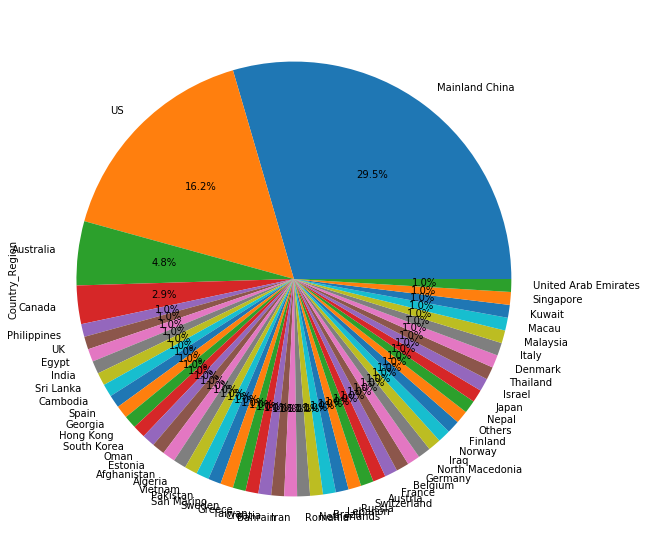

In [40]:
plt.figure(figsize=(20,10))
df['Country_Region'].value_counts().plot.pie(autopct="%1.1f%%")

# Check for Distribution on Map
+ Lat/Long
+ Geometry/ Point

In [41]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [43]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [45]:
# Convert Data to GeoDataframe
gdf01 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Long'],df['Lat']))

In [46]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [47]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [48]:
# Method 2
points = [ Point(x,y) for x,y in zip(df.Long,df.Lat)]

In [49]:
gdf03 = gpd.GeoDataFrame(df,geometry=points)

In [50]:
gdf03

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3880,NaN,Romania,45.9432,24.9668,2/27/20,1,0,0,POINT (24.96680 45.94320)
3881,NaN,Denmark,56.2639,9.5018,2/27/20,1,0,0,POINT (9.50180 56.26390)
3882,NaN,Estonia,58.5953,25.0136,2/27/20,1,0,0,POINT (25.01360 58.59530)
3883,NaN,Netherlands,52.1326,5.2913,2/27/20,1,0,0,POINT (5.29130 52.13260)


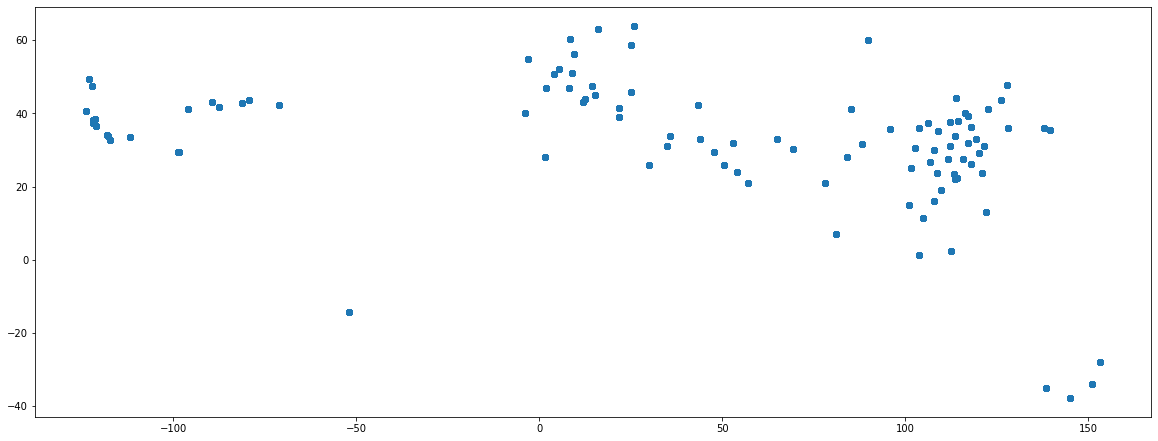

In [51]:
# Map Plot
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

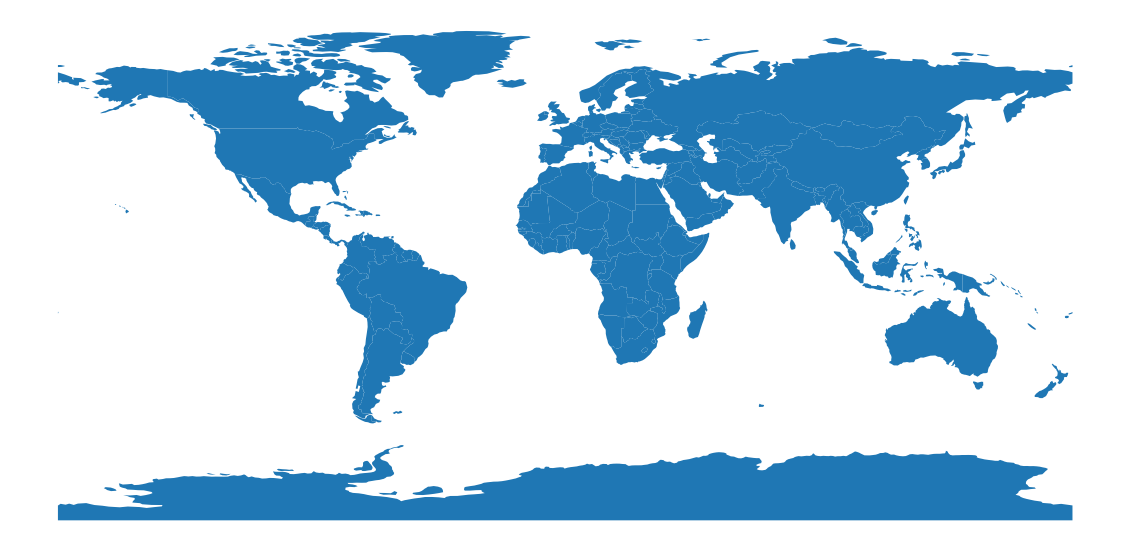

In [52]:
# overlapping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

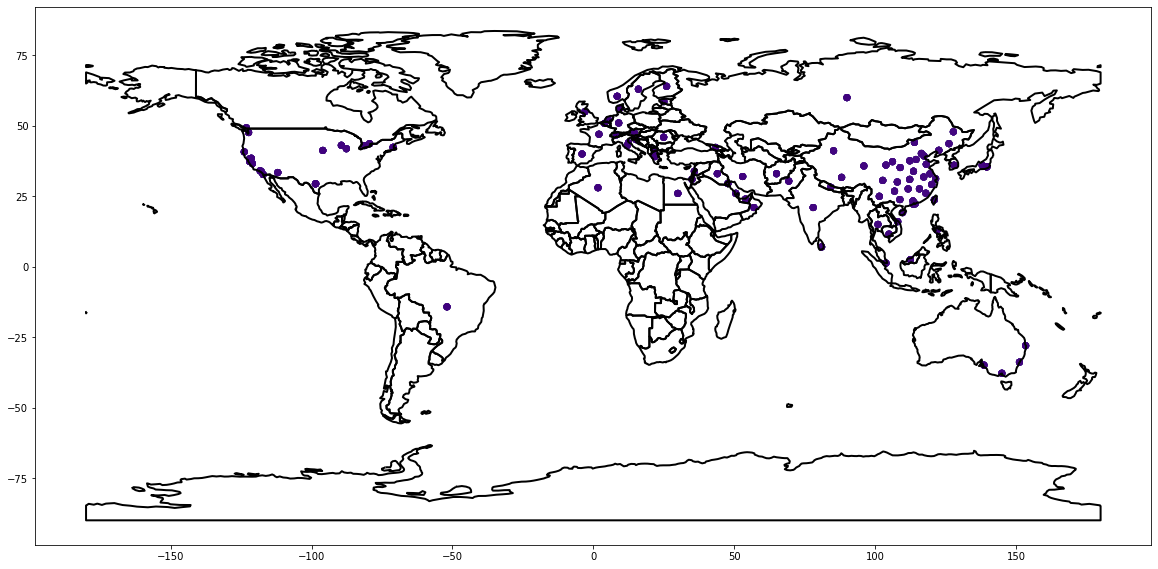

In [53]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

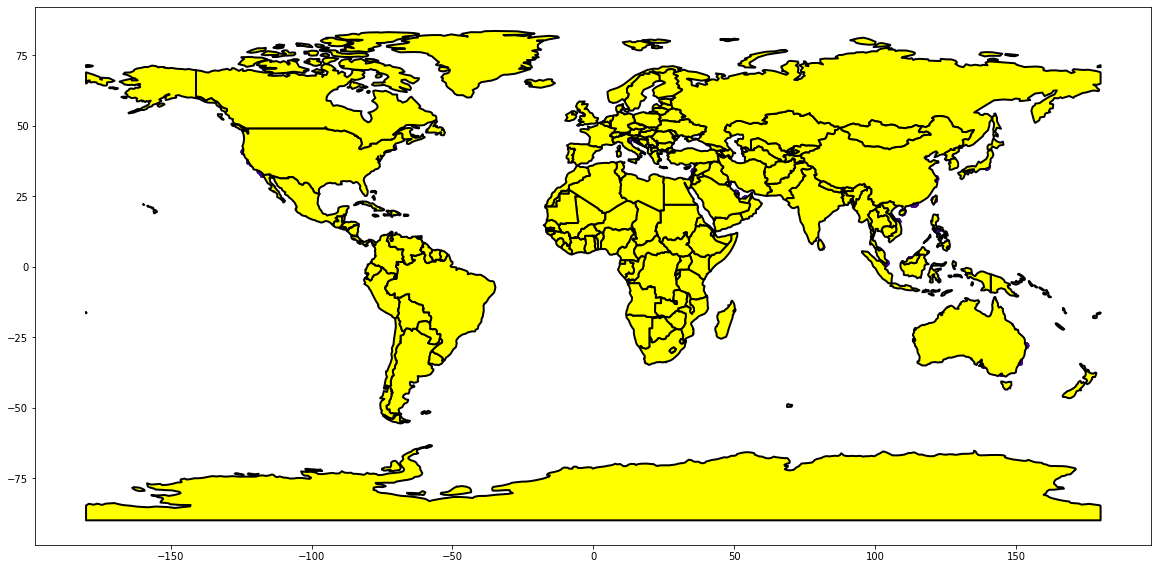

In [54]:
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.plot(color='Yellow',edgecolor='k',linewidth=2,ax=ax)

In [55]:
# Per Country
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [56]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [57]:
asia = world[world['continent'] == 'Asia']

In [58]:
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [59]:
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

In [60]:
# Cases in China
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [61]:
df[df['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


In [62]:
gdf01[gdf01['Country_Region'] == 'Mainland China']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


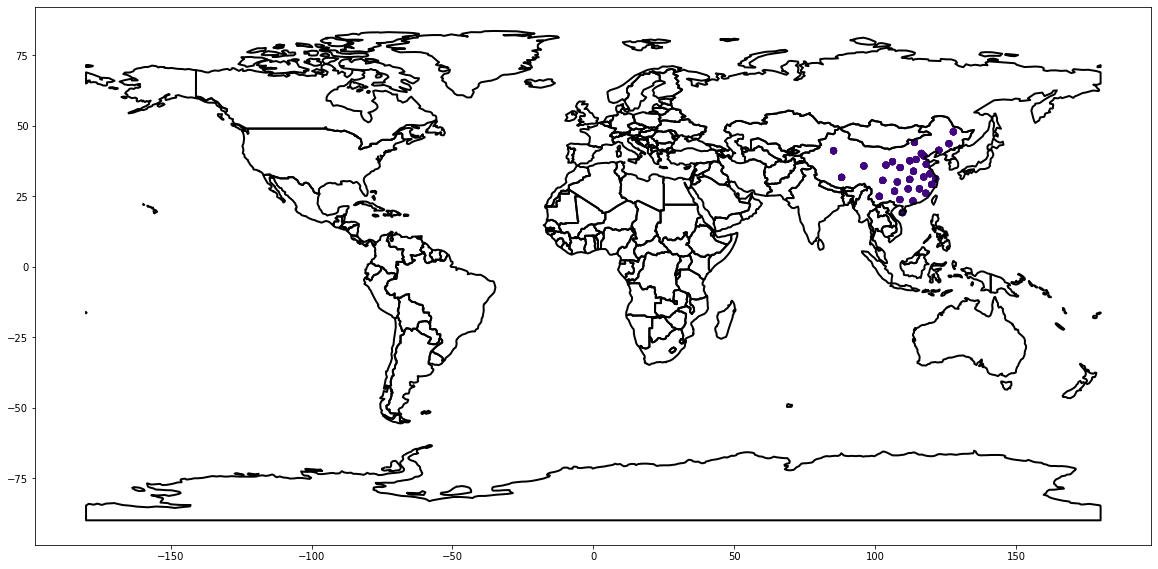

In [63]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

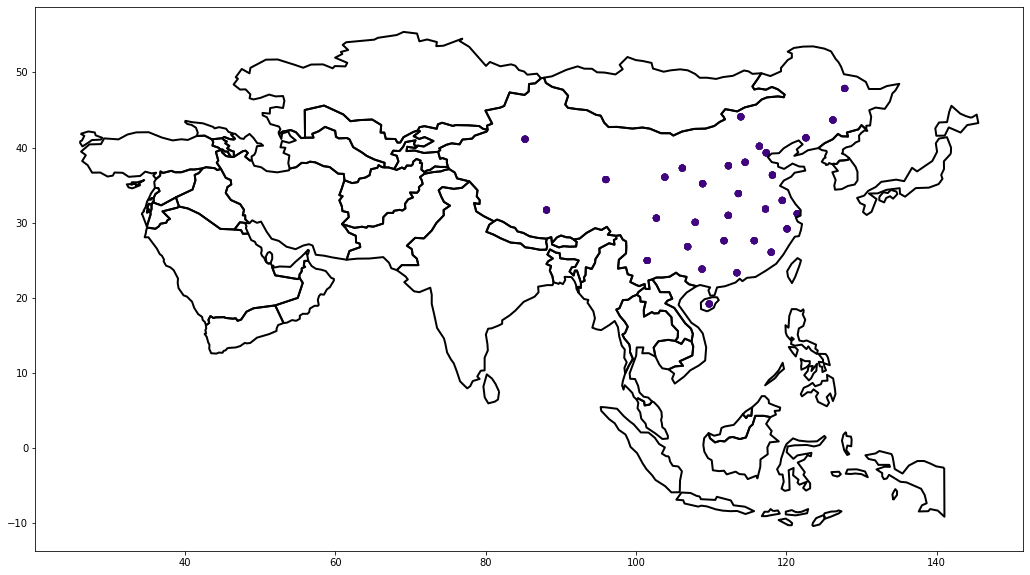

In [65]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

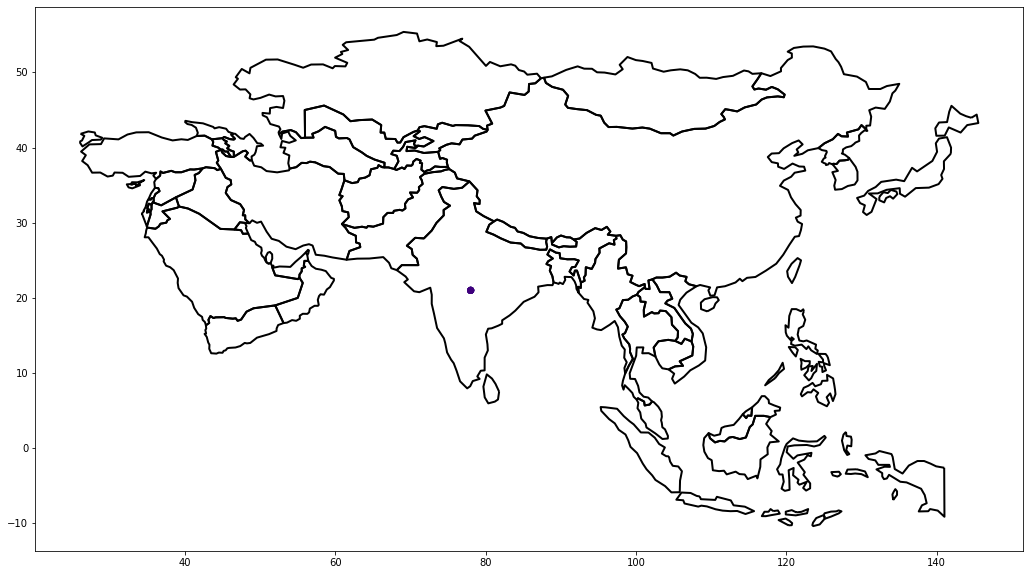

In [66]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

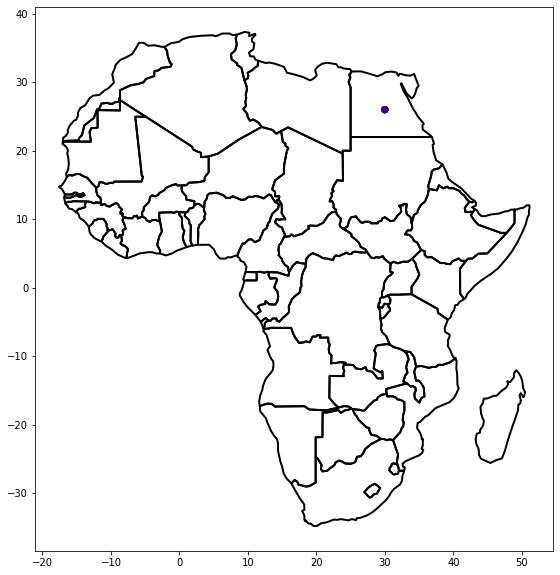

In [67]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Egypt'].plot(cmap='Purples',ax=ax)
africa.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

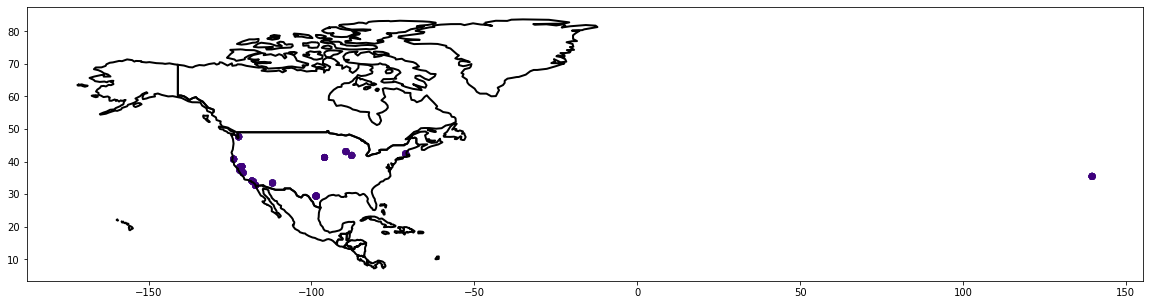

In [68]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'US'].plot(cmap='Purples',ax=ax)
north_america.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

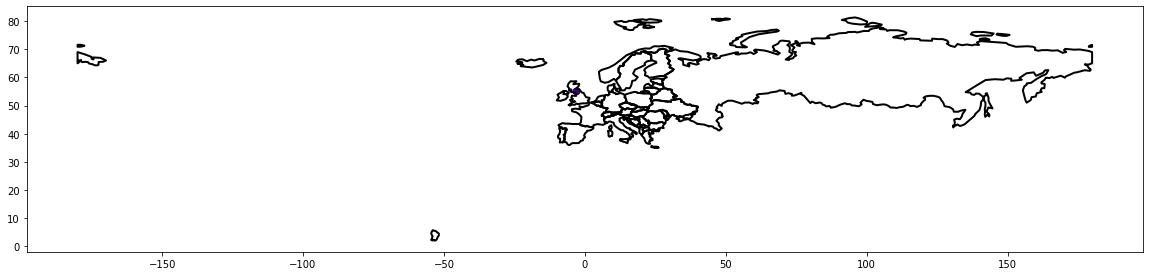

In [69]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'UK'].plot(cmap='Purples',ax=ax)
europe.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [70]:
# Time Series Analysis
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [71]:
df_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [72]:
# Copy
df2 = df

In [73]:
df.to_csv("coronavirus_data_clean.csv")

In [74]:
import datetime as dt

In [75]:
df['cases_date'] = pd.to_datetime(df2['Date'])

In [76]:
df2.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

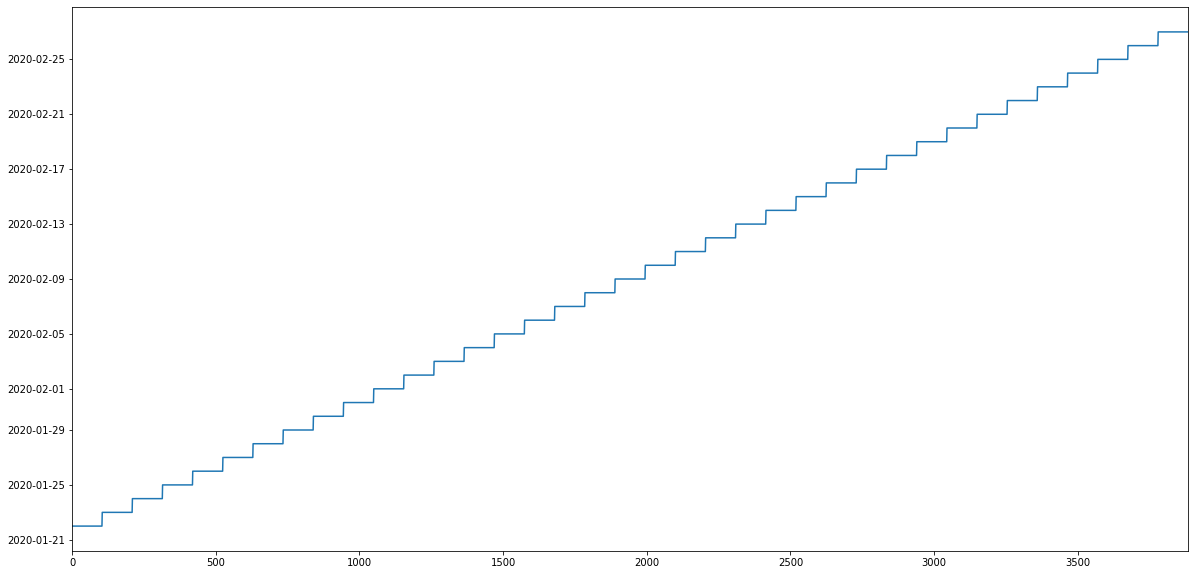

In [77]:
df['cases_date'].plot(figsize=(20,10))

In [78]:
ts = df2.set_index('cases_date')

## ts

In [80]:
# Select For January
ts.loc['2020-01']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-01-22,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-01-31,NaN,Romania,45.9432,24.9668,1/31/20,0,0,0,POINT (24.96680 45.94320)
2020-01-31,NaN,Denmark,56.2639,9.5018,1/31/20,0,0,0,POINT (9.50180 56.26390)
2020-01-31,NaN,Estonia,58.5953,25.0136,1/31/20,0,0,0,POINT (25.01360 58.59530)


In [81]:
ts.loc['2020-02-24':'2020-02-25']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,
2020-02-24,Anhui,Mainland China,31.8257,117.2264,2/24/20,989,6,663,POINT (117.22640 31.82570)
2020-02-24,Beijing,Mainland China,40.1824,116.4142,2/24/20,399,4,198,POINT (116.41420 40.18240)
2020-02-24,Chongqing,Mainland China,30.0572,107.8740,2/24/20,576,6,349,POINT (107.87400 30.05720)
2020-02-24,Fujian,Mainland China,26.0789,117.9874,2/24/20,293,1,183,POINT (117.98740 26.07890)
2020-02-24,Gansu,Mainland China,36.0611,103.8343,2/24/20,91,2,80,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-02-25,NaN,Romania,45.9432,24.9668,2/25/20,0,0,0,POINT (24.96680 45.94320)
2020-02-25,NaN,Denmark,56.2639,9.5018,2/25/20,0,0,0,POINT (9.50180 56.26390)
2020-02-25,NaN,Estonia,58.5953,25.0136,2/25/20,0,0,0,POINT (25.01360 58.59530)


In [82]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']]

,Confirmed,Recovered
cases_date,,
2020-02-24,989,663
2020-02-24,399,198
2020-02-24,576,349
2020-02-24,293,183
2020-02-24,91,80
...,...,...
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0


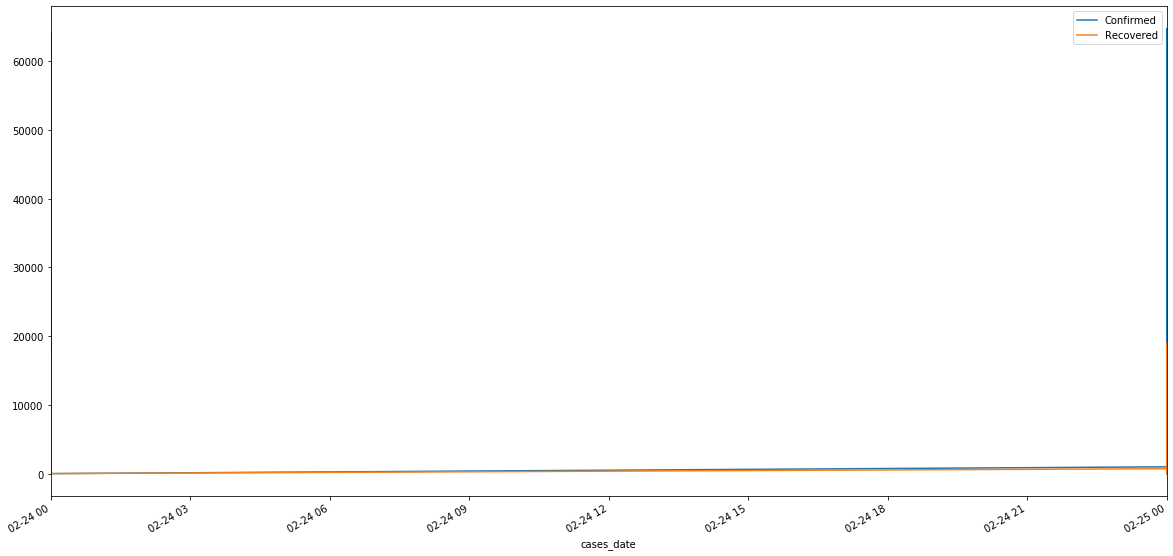

In [83]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']].plot(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737480.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


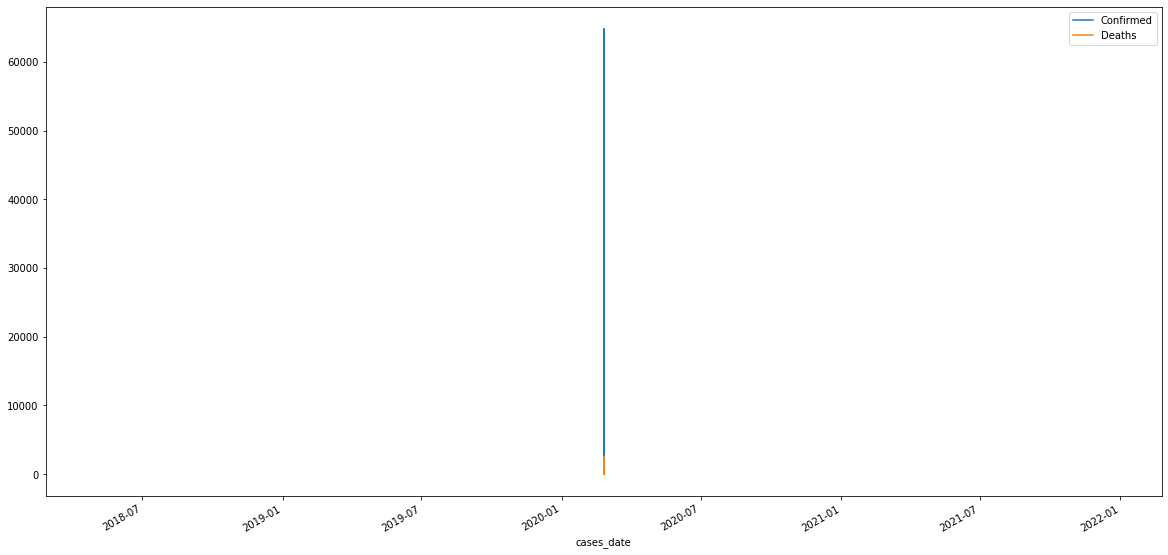

In [86]:
ts.loc['2020-02-2':'2020-02-25'][['Confirmed','Deaths']].plot(figsize=(20,10))

In [89]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop=None)

In [90]:
df_by_date

,cases_date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,3386.46002,4806.4548,555,17,28
1,2020-01-23,3386.46002,4806.4548,653,18,30
2,2020-01-24,3386.46002,4806.4548,941,26,36
3,2020-01-25,3386.46002,4806.4548,1434,42,39
4,2020-01-26,3386.46002,4806.4548,2118,56,52
5,2020-01-27,3386.46002,4806.4548,2927,82,61
6,2020-01-28,3386.46002,4806.4548,5578,131,107
7,2020-01-29,3386.46002,4806.4548,6166,133,126
8,2020-01-30,3386.46002,4806.4548,8234,171,143
9,2020-01-31,3386.46002,4806.4548,9927,213,222


In [91]:
df_by_date.columns

Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

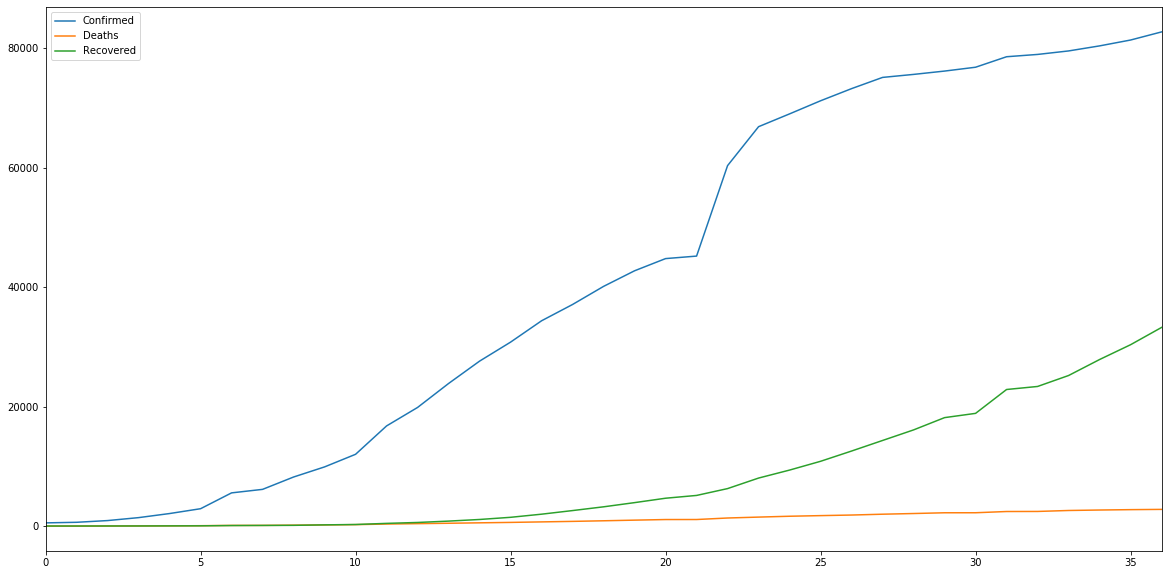

In [92]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(20,10))

In [ ]:
#### Thanks For Your Time
# Jesus Saves @JCharisTech
# Jesse E.Agbe(JCharis)